# Beta Binomial sample using Gibbs sampeling


$p \sim Beta(\alpha,\beta)$ and $X\sim Bino(N,p)$

$$
x^{(t+1)} \sim \text{Bin}\left( n,p^{(t)} \right), \,
p^{(t+1)} \sim \text{Beta}\left(x^{(t+1)}+\alpha, n-x^{(t+1)}+\beta \right)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## variables
SAMPLE_SIZE = 100_000
N = 10
ALPHA = 7
BETA = 2

t_mean = (N * ALPHA) / (ALPHA + BETA)
t_variance = ((N * ALPHA * BETA) / (ALPHA + BETA) ** 2) * (
    (ALPHA + BETA + N) / (ALPHA + BETA + 1)
)
print(f"Theoritical\nMean: {t_mean}\nVariance: {t_variance}")

Theoritical
Mean: 7.777777777777778
Variance: 3.28395061728395


In [6]:
burn_in = int(0.25*SAMPLE_SIZE)

In [3]:
sample = [[np.random.beta(ALPHA, BETA)], []]
for _ in range(SAMPLE_SIZE):
    current_p = sample[0][-1]
    new_x = np.random.binomial(N, current_p)
    new_p = np.random.beta(new_x + ALPHA, N - new_x + BETA)
    sample[0].append(new_p)
    sample[1].append(new_x)

In [11]:
np.mean(sample[1])

7.77812

In [10]:
np.var(sample[1])

3.2736292656

Text(0.5, 0, 'Theoritical: Mean = 7.7778, Variance = 3.2840\nEmpirical: Mean = 7.7781, Variance = 3.2736')

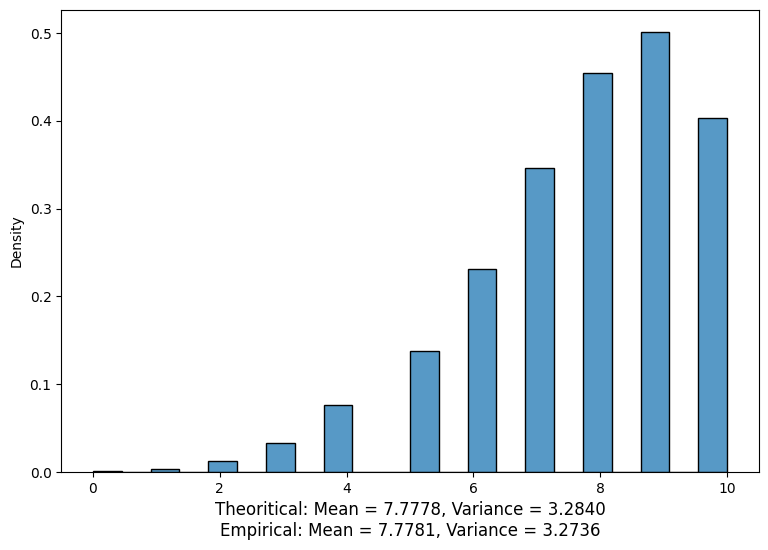

In [13]:
plt.figure(figsize=(9, 6))
sns.histplot(sample[1], bins=22, stat="density")
plt.xlabel(
    f"Theoritical: Mean = {t_mean:0.4f}, Variance = {t_variance:0.4f}\nEmpirical: Mean = {np.mean(sample[1]):0.4f}, Variance = {np.var(sample[1]):.4f}",
    fontsize=12,
)